In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import time
from sys import platform
import os 
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=2)

In [18]:
if platform == 'linux':
    home = '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/'
elif platform == 'darwin': 
    home = '/Users/i_67981492/dynamic_decision_policy_reconfiguration/'
    
print(platform, home)

linux /lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/


In [39]:
data_dir = os.path.join(home, 'analysis_revision/loki0.5_acc_av_models/single_param_model_traces/'); print(data_dir)
write_dir = os.path.join(home, 'analysis_revision/loki0.5_acc_av_models/manifold_estimation/'); print(write_dir)

/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/loki0.5_acc_av_models/single_param_model_traces/
/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/loki0.5_acc_av_models/manifold_estimation/


In [40]:
a_df = pd.read_csv(os.path.join(data_dir, 'a_shifted_epoch_trial_traces.csv')).dropna(axis='rows')
v_df = pd.read_csv(os.path.join(data_dir, 'v_shifted_epoch_trial_traces.csv')).dropna(axis='rows')

In [41]:
v_df.head()

,mcmc_iteration,shifted_epoch_trial,v,model,ddm_param
0,0,-1.0,0.357331,v_shifted_epoch_trial,v
1,1,-1.0,0.461415,v_shifted_epoch_trial,v
2,2,-1.0,0.259656,v_shifted_epoch_trial,v
3,3,-1.0,0.299286,v_shifted_epoch_trial,v
4,4,-1.0,0.197033,v_shifted_epoch_trial,v


In [42]:
a_df.head()

,mcmc_iteration,shifted_epoch_trial,a,model,ddm_param
0,0,-1.0,0.983536,a_shifted_epoch_trial,a
1,1,-1.0,0.978072,a_shifted_epoch_trial,a
2,2,-1.0,0.972083,a_shifted_epoch_trial,a
3,3,-1.0,0.994221,a_shifted_epoch_trial,a
4,4,-1.0,0.972216,a_shifted_epoch_trial,a


In [43]:
a_df['a_est_z'] = zscore(a_df[['a']])
v_df['v_est_z'] = zscore(v_df[['v']])

In [44]:
print(v_df.mcmc_iteration.max(), a_df.mcmc_iteration.max())

1666 1666


In [45]:
print(v_df.shifted_epoch_trial.unique(), a_df.shifted_epoch_trial.unique())

[-1.  0.  1.  2.  3.] [-1.  0.  1.  2.  3.]


In [46]:
print(len(v_df), len(a_df))

8335 8335


In [47]:
full_df = v_df.copy().drop(columns=['model', 'ddm_param'])
full_df[['a', 'a_est_z']] = a_df[['a', 'a_est_z']]

In [48]:
full_df.head()

,mcmc_iteration,shifted_epoch_trial,v,v_est_z,a,a_est_z
0,0,-1.0,0.357331,0.767298,0.983536,0.438212
1,1,-1.0,0.461415,1.101603,0.978072,0.112915
2,2,-1.0,0.259656,0.453579,0.972083,-0.243700
3,3,-1.0,0.299286,0.580862,0.994221,1.074437
4,4,-1.0,0.197033,0.252441,0.972216,-0.235758


In [49]:
assert 'a_est_z' in full_df, 'z-scored a is missing. check df.'
assert 'v_est_z' in full_df, 'z-scored v is missing. check df.'

In [50]:
def cart2polar(x,y): # note that this should be implemented for each epoch after nesting within condition and sub

    x_diff, y_diff = x.diff(), y.diff()
    r = np.hypot(x_diff, y_diff)
    theta_radians = np.arctan2(y_diff, x_diff)
    theta_deg = np.rad2deg(theta_radians)
    return r, theta_radians, theta_deg

In [51]:
full_df.head()

,mcmc_iteration,shifted_epoch_trial,v,v_est_z,a,a_est_z
0,0,-1.0,0.357331,0.767298,0.983536,0.438212
1,1,-1.0,0.461415,1.101603,0.978072,0.112915
2,2,-1.0,0.259656,0.453579,0.972083,-0.243700
3,3,-1.0,0.299286,0.580862,0.994221,1.074437
4,4,-1.0,0.197033,0.252441,0.972216,-0.235758


In [53]:
dats = []

for it in full_df.mcmc_iteration.unique(): 
    
    dat = full_df.loc[full_df.mcmc_iteration == it].copy()
    
    r, theta_radians, theta_deg = cart2polar(dat.a_est_z, dat.v_est_z) 
    

    dat['r_z'] = r
    dat['theta_radians_z'] = theta_radians
    dat['theta_deg_z'] = theta_deg
    
#     print(dat.r_z, dat.theta_deg_z)

    dat.reset_index(drop=True, inplace=True)
    dats.append(dat)

In [54]:
av_polar_est_df = pd.concat(dats)

In [36]:
av_polar_est_df.head()

,mcmc_iteration,shifted_epoch_trial,v,v_est_z,a,a_est_z,r_z,theta_radians_z,theta_deg_z
0,0,-1,1.165847,1.523414,0.799337,-0.439473,NaN,NaN,NaN
1,0,0,-0.826085,-1.238133,0.830902,1.568585,1.992182,-1.554951,-89.092146
2,0,1,-0.533549,-0.832571,0.805968,-0.017621,0.293597,1.655824,94.871723
3,0,2,0.149891,0.114927,0.791887,-0.913459,0.683585,1.591398,91.180371
4,0,3,0.603051,0.743173,0.801742,-0.286517,0.453268,1.549053,88.754173


In [55]:
av_polar_est_df.to_csv(os.path.join(write_dir, 'av_polar_est_df.csv'), index=False)

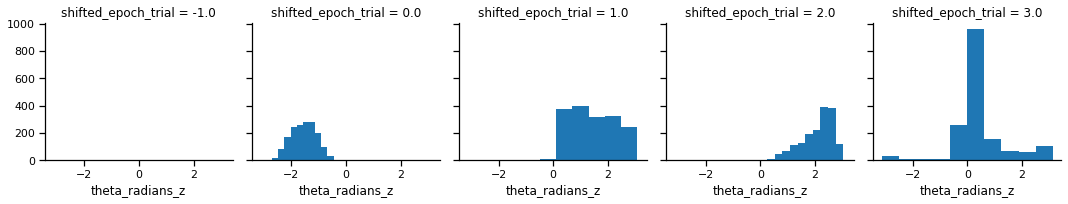

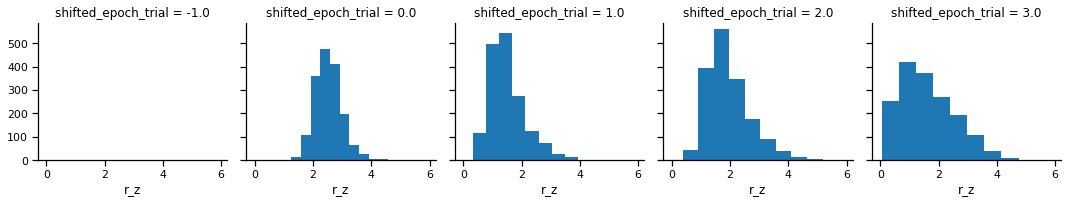

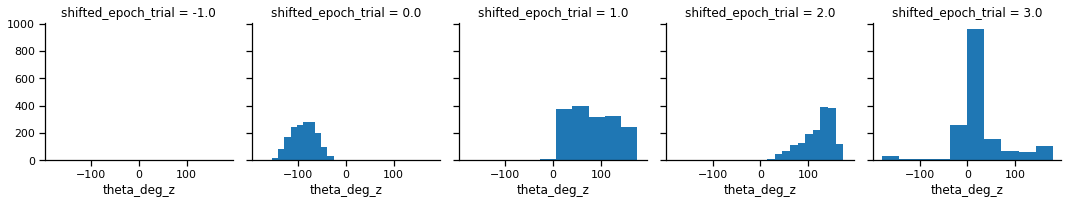

In [56]:

sns.set_context("notebook", font_scale=1)

g = sns.FacetGrid(data=av_polar_est_df, col='shifted_epoch_trial')
g = g.map(plt.hist, 'theta_radians_z')
plt.savefig(os.path.join(write_dir, 'theta_radians_z.png'))

g = sns.FacetGrid(data=av_polar_est_df, col='shifted_epoch_trial')
g = g.map(plt.hist, 'r_z')
plt.savefig(os.path.join(write_dir,'r_z.png'))

g = sns.FacetGrid(data=av_polar_est_df, col='shifted_epoch_trial')
g = g.map(plt.hist, 'theta_deg_z')
plt.savefig(os.path.join(write_dir, 'theta_deg_z.png'))